In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import random

# Question 1

Using the exoplanet database (https://exoplanetarchive.ipac.caltech.edu/), identify the sample of confirmed planets that have independent measurements of both their mass and radius.
Make a plot of the mass versus radius, with a point on the plot representing each planet. On
this same plot, make simple curves that represent the mass versus radius for planets that are
composed entirely of rock, water, and ice. Finally, on this same plot, indicate the mass and
radii of the solar system planets. (50)
In a one-page write-up (11pt, single-spaced font), discuss your analysis method and results.
Your write-up should include:
1. State the number of planets in your sample, and your methods for obtaining this number.
2. Does the mass and the radius correlate as you would expect?
3. How do the densities of exoplanets compare the those of Solar system planets?
4. Are exoplanets are more consistent with being composed entirely of rock or ice? More
generally, discuss the importance of characterizing planets according to their densities.

#### Planets from the exoplanet database

In [10]:
Planet_tab = pd.read_csv("Planetary Data.csv")
Planet_tab.head()

,pl_name,star_num,plan_num,pl_rad_e,pl_rad_j,pl_mass_e,pl_mass_j,ra,dec,dist,mag
0,Kepler-138 b,1,3,0.522,0.047,0.066,0.00021,290.381412,43.293064,66.8624,12.471500
1,Kepler-444 e,3,5,0.500,0.045,0.100,0.00031,289.752832,41.631884,36.4396,8.643251
2,Kepler-138 b,1,3,0.701,0.063,0.187,0.00059,290.381412,43.293064,66.8624,12.471500
3,Kepler-444 d,3,5,0.500,0.045,0.200,0.00063,289.752832,41.631884,36.4396,8.643251
4,TRAPPIST-1 d,1,7,0.784,0.070,0.297,0.00093,346.626392,-5.043462,NaN,15.645100


After filtering through the selected data from the exoplanet database, we were able to separate the planets mass (in both Earth mass and Jupiter mass), the planets radius (in both Earth radii and Jupiter radii) and the ra, dec, distance of the planetary system, along with the magnitude of the star that was collected by gaia. We will be using the Earth mass and radii throughout the rest of the project for consistency.

In [11]:
#First we will create an array for the Eath mass and radii of the planet
E_mass = []
E_radii = []

for i in range(len(Planet_tab)):
    E_radii.append(Planet_tab['pl_rad_e'][i])
    E_mass.append(Planet_tab['pl_mass_e'][i])

#### Solar System Planets
Next we will be taking a sample of the planets within our solar system and adding their data to our sample. Their data points were found with a quick online search.

In [3]:
Solar_System = pd.read_csv("Solar System Planets.csv")
Solar_System

,pl_name,mass_kg,rad_km
0,Mercury,3.290000e+23,2439.7
1,Venus,4.870000e+24,6051.8
2,Earth,5.970000e+24,6371.0
3,Mars,6.390000e+23,3389.5
4,Jupiter,1.900000e+27,69911.0
5,Saturn,5.680000e+26,58232.0
6,Uranus,8.680000e+25,25362.0
7,Neptune,1.020000e+26,24622.0


In [4]:
print("The total number of planets we have in our sample is " + str(len(Planet_tab) + len(Solar_System)) +". This number " +
      "is a result of removing any planet in the exoplanet database that has a mass or radius that is missing or below zero" +
     " and adding that to the planets we have in our solar system.")

The total number of planets we have in our sample is 1955. This number is a result of removing any planet in the exoplanet database that has a mass or radius that is missing or below zero and adding that to the planets we have in our solar system.


In [5]:
#We will now convert the units of kg and km of our solar system planets to that of Earth Mass and radius

mass = []
rad = []

Earth_M = 5.9722e24  #Kg
Earth_R = 6371       #Km

for i in range(len(Solar_System)):
    mass.append(Solar_System["mass_kg"][i] /Earth_M)
    rad.append(Solar_System["rad_km"][i] /Earth_R)

#### Planet density curves
We will now create functions that will cover rock, water, and ice density. We will be using the Mass-Density relationship as listed below:

$$\rho = \frac{3M}{4\pi r^3}$$

Where $\rho$ is the density, $M$ is mass, and $r$ is our radius. <br>
Rearranging:

$$r = \Big(\frac{3M}{4\pi \rho}\Big)^{\frac{1}{3}}$$

In [6]:
#Density curves
Mass = np.arange(np.min(mass), np.max(mass)*100, 1)  #We are taking our minimum value of our data set 
                                                     #as our lower bound and taking the maximum value 
                                                     #of our dataset as our upper bound
water_d = 1/10   #g/cm^3
ice_d = 0.92/10   #g/cm^3
rock_d = 3/10    #g/cm^3

water_r = ((3*Mass)/(4*np.pi*water_d))**(1/3)  #water radius
ice_r = ((3*Mass)/(4*np.pi*ice_d))**(1/3)      #ice radius
rock_r = ((3*Mass)/(4*np.pi*rock_d))**(1/3)    #rock radius

#### Plotting the figure
Now we will now create our first graph of the planets mass versus its radius:

/Users/felix/anaconda3/envs/grizli/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


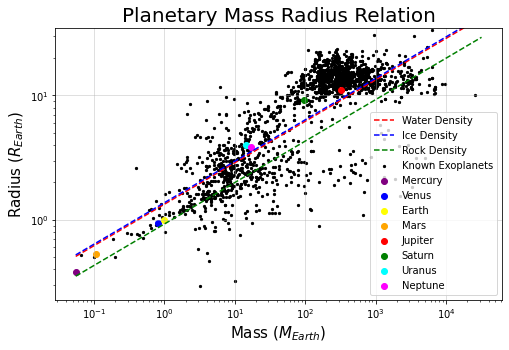

In [13]:
#Making the Legend
legend_name = ['Water Density','Ice Density','Rock Density','Known Exoplanets','Mercury',
               'Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
              
#Making the figure
plt.figure(figsize = (8,5))
ax = plt.gca()
plt.title('Planetary Mass Radius Relation', fontsize = 20)

#Plotting the planets:
plt.scatter(E_mass,E_radii, s = 5, c = 'black')   #These are the exoplanets from our table
plt.scatter(mass[0],rad[0], c = 'purple')         #Mercury
plt.scatter(mass[1],rad[1], c = 'blue')           #Venus
plt.scatter(mass[2],rad[2], c = 'yellow')         #Earth
plt.scatter(mass[3],rad[3], c = 'orange')         #Mars
plt.scatter(mass[4],rad[4], c = 'red')            #Jupiter
plt.scatter(mass[5],rad[5], c = 'green')          #Saturn 
plt.scatter(mass[6],rad[6], c = 'cyan')           #Uranus
plt.scatter(mass[7],rad[7], c = 'magenta')        #Neptune

#Plotting the density functions:
plt.plot(Mass,water_r, c = 'red',linestyle = 'dashed')
plt.plot(Mass,ice_r, c = 'blue',linestyle = 'dashed')
plt.plot(Mass,rock_r, c = 'green',linestyle = 'dashed')

#Scaling the axis
ax.set_xscale('log')
ax.set_yscale('log')

plt.legend(labels = legend_name)
plt.grid(alpha = .5)
plt.minorticks_on()
plt.xlabel('Mass $(M_{Earth})$', fontsize = 15)
plt.ylabel('Radius $(R_{Earth})$', fontsize = 15)
plt.ylim(0,35)

#plt.savefig('/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/Final/Planetary Mass Radius Relation.png',bbox = 'tight')
plt.show()

# Question 2
Define m as the number of planets around a star, so that m = 1, 2, 3, 4, 5, 6, .... The exoplanet
multiplicity function gives the distribution of m for the stars that are known to host planets.
Using the exoplanet database, for the sample of confirmed planets, make a histogram of the
exoplanet multiplicity function. What is the mean and the variance of this distribution? Select
any subsample of stars or planets of your choosing, and then plot the corresponding multiplicity
function for this sample. (50)
In a one-page write-up (11pt, single-spaced font), discuss your analysis method and results.
Your write-up should include:
1. Your methods for obtaining the multiplicity function
2. The importance of understanding the planet multiplicity function.
3. The biases and the problem in extracting the planet multiplicity function from observations.
4. Explain your choice of subsample, and the behavior of this subsample relative to the entire
sample.

### Making the Histogram

In [14]:
N_planet = Planet_tab['plan_num']   #This is our m for the multiplicity function

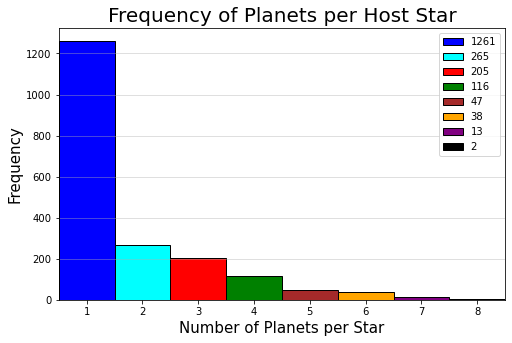

In [18]:
#making a histogram of the exoplanets
len_1,len_2,len_3,len_4,len_5,len_6,len_7,len_8 = [],[],[],[],[],[],[],[]
leftover = []

#finding the length of each bin
for i in range(len(N_planet)):
    if N_planet[i] == 1:
        len_1.append(N_planet[i])
        pass
    if N_planet[i] == 2:
        len_2.append(N_planet[i])
        pass
    if N_planet[i] == 3:
        len_3.append(N_planet[i])
        pass
    if N_planet[i] == 4:
        len_4.append(N_planet[i])
        pass
    if N_planet[i] == 5:
        len_5.append(N_planet[i])
        pass
    if N_planet[i] == 6:
        len_6.append(N_planet[i])
        pass
    if N_planet[i] == 7:
        len_7.append(N_planet[i])
        pass
    if N_planet[i] == 8:
        len_8.append(N_planet[i])
        pass
    else:
        leftover.append(N_planet[i])
        
#plotting the figure
plt.figure(figsize = [8,5])
plt.title("Frequency of Planets per Host Star", fontsize = 20)
plt.xlabel("Number of Planets per Star", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.grid(axis = 'y', alpha = .5)
plt.xlim(0.5,8.5)

N, bins, patches = plt.hist(N_planet,ec = 'black',bins = np.arange(10)-.5)

#changing each bins color with the length defined before
for i in range(1,2):
    patches[i].set_facecolor('blue')
for i in range(2,3):
    patches[i].set_facecolor('cyan')
for i in range(3,4):
    patches[i].set_facecolor('red')
for i in range(4,5):
    patches[i].set_facecolor('green')
for i in range(5,6):
    patches[i].set_facecolor('brown')
for i in range(6,7):
    patches[i].set_facecolor('orange')
for i in range(7,8):
    patches[i].set_facecolor('purple')
for i in range(8,9):
    patches[i].set_facecolor('black')
       

#Making the legend
handles = [plt.Rectangle((0,0),1,1,color=c,ec="k") for c in ['blue','cyan','red','green','brown','orange','purple','black']]
labels= [len(len_1),len(len_2),len(len_3),len(len_4),len(len_5),len(len_6),len(len_7),len(len_8)]
plt.legend(handles, labels)

#plt.savefig('/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/Final/Exoplanet Multiplicity Graph.png',bbox = 'tight')
plt.show()

### Finding the mean and variance

In [19]:
#finding the mean and variance of the exoplanet multiplicity function
mean = np.sum(N_planet)/len(N_planet)
std = np.std(N_planet)    #var = std^2
var = np.var(N_planet)

print("The mean of the planetary distribution is: " + str(np.round(mean,4)))
print("The variance of the planetary distribution is: " + str(np.round(var,4)))

The mean of the planetary distribution is: 1.7668
The variance of the planetary distribution is: 1.6703


### Finding the Multiplicity Function

Plotting the data on a graph, it is obvious the data was not linear, so in attempts to find an appropriate model for the exoplanet multiplicity function we will use $\frac{1}{x}$ as a model to best fit the curve as it looked to the most similar to the data. After choosing $\frac{1}{x}$ as a model we performed a linear regression on the transformed data to find the other coeffiencets. We found:
1. slope: 1402.40
2. y-intecept: -233.096

Thus the Exoplanet multiplicity function is:

$$ N = \frac{1402.49}{m} - 233.096$$

Where $N$ is the number of star systems, and $m$ is the number of planets per star.

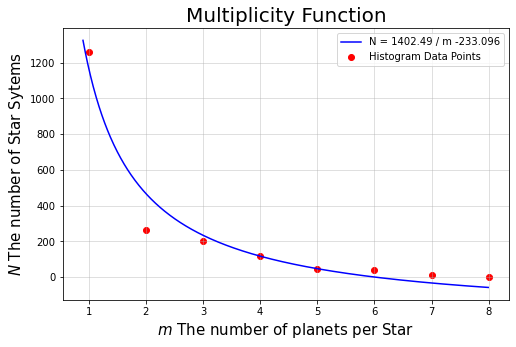

In [20]:
#The values from our Histogram
m = 1,2,3,4,5,6,7,8
x = labels

#Values from our linear Regression
r = .9766
slope = 1402.49
intercept= -233.096

#Creating the Multiplicity Function
xaxis = np.arange(.9,8,.01)
y = slope/xaxis + intercept

#Making the figure
plt.figure(figsize = (8,5))
plt.grid(alpha = .5)
plt.title("Multiplicity Function",size=20)
plt.xlabel("$m$ The number of planets per Star",size = 15)
plt.ylabel("$N$ The number of Star Sytems",size = 15)

plt.scatter(m,x, color = 'red', label = "Histogram Data Points")
plt.plot(xaxis,y,color = 'blue', label = 'N = '+str(slope)+' / m '+str(intercept))

plt.legend()

#plt.savefig('/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/Final/Multiplicity Function.png',bbox = 'tight')
plt.show()

### Working with a subsample

We will be choosing a random subsample within our sample to plot on the multiplicity function.

In [21]:
#picking a random sample of length 400
subsample = []

i=0
while i < 400:
    rand_plan = random.choice(Planet_tab['plan_num'].T) #this picks a random row from our Planet table
    subsample.append(rand_plan) 
    i = i +1

Now we redo the steps we did in the previous sections but with this subsample instead

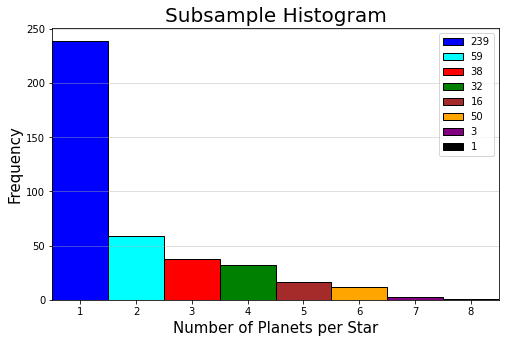

In [22]:
#making a histogram of the exoplanets
len_1,len_2,len_3,len_4,len_5, Welen_6,len_7,len_8 = [],[],[],[],[],[],[],[]
leftover = []

#finding the length of each bin
for i in range(len(subsample)):
    if subsample[i] == 1:
        len_1.append(subsample[i])
        pass
    if subsample[i] == 2:
        len_2.append(subsample[i])
        pass
    if subsample[i] == 3:
        len_3.append(subsample[i])
        pass
    if subsample[i] == 4:
        len_4.append(subsample[i])
        pass
    if subsample[i] == 5:
        len_5.append(subsample[i])
        pass
    if subsample[i] == 6:
        len_6.append(subsample[i])
        pass
    if subsample[i] == 7:
        len_7.append(subsample[i])
        pass
    if subsample[i] == 8:
        len_8.append(subsample[i])
        pass
    else:
        leftover.append(subsample[i])
        
#plotting the figure
plt.figure(figsize = [8,5])
plt.title("Subsample Histogram", fontsize = 20)
plt.xlabel("Number of Planets per Star", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.grid(axis = 'y', alpha = .5)
plt.xlim(0.5,8.5)

N, bins, patches = plt.hist(subsample,ec = 'black',bins = np.arange(10)-.5)

#changing each bins color with the length defined before
for i in range(1,2):
    patches[i].set_facecolor('blue')
for i in range(2,3):
    patches[i].set_facecolor('cyan')
for i in range(3,4):
    patches[i].set_facecolor('red')
for i in range(4,5):
    patches[i].set_facecolor('green')
for i in range(5,6):
    patches[i].set_facecolor('brown')
for i in range(6,7):
    patches[i].set_facecolor('orange')
for i in range(7,8):
    patches[i].set_facecolor('purple')
for i in range(8,9):
    patches[i].set_facecolor('black')
       

#Making the legend
handles = [plt.Rectangle((0,0),1,1,color=c,ec="k") for c in ['blue','cyan','red','green','brown','orange','purple','black']]
labels_sub= [len(len_1),len(len_2),len(len_3),len(len_4),len(len_5),len(len_6),len(len_7),len(len_8)]
plt.legend(handles, labels_sub)

#plt.savefig('/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/Final/Exoplanet Subsample Hist.png',bbox = 'tight')
plt.show()

Running these new values of $m$ and $N$ into the linear regression with $\frac{1}{x}$ as a model we get values of:
1. slope: 278.754
2. y-intercept: -44.7017

Thus the Exoplanet Multiplicity Subsample function is:
$$ N = \frac{278.754}{m} - 44.7017$$

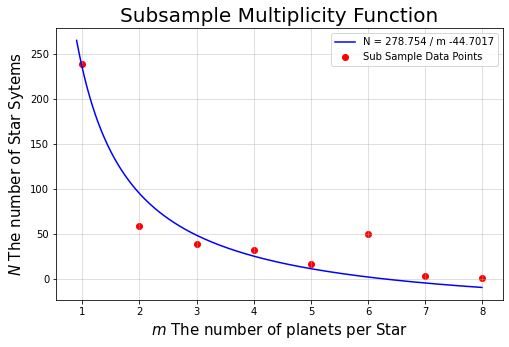

In [23]:
#The values from our Histogram
m = 1,2,3,4,5,6,7,8
x = labels_sub

#Values from our linear Regression
slope = 278.754
intercept= -44.7017

#Creating the Multiplicity Function
xaxis = np.arange(.9,8,.01)
y = slope/xaxis + intercept

#Making the figure
plt.figure(figsize = (8,5))
plt.grid(alpha = .5)
plt.title("Subsample Multiplicity Function",size=20)
plt.xlabel("$m$ The number of planets per Star",size = 15)
plt.ylabel("$N$ The number of Star Sytems",size = 15)

plt.scatter(m,x, color = 'red', label = "Sub Sample Data Points")
plt.plot(xaxis,y,color = 'blue', label = 'N = '+str(slope)+' / m '+str(intercept))

plt.legend()

#plt.savefig('/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/Final/Subsample Multiplicity Function.png',bbox = 'tight')
plt.show()